In [12]:
from saliency import saliency
from utils import saliency_plot

import torch
import torchvision.transforms as T
from PIL import Image

#load pre-trained VGG16
vgg16 = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
vgg16.eval()

a = Image.open("cat.jpg")

img2tensor = T.Compose([
    T.ToTensor(),
    T.Resize(256),
    T.CenterCrop(224),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_batch = img2tensor(a).unsqueeze(0)

# group convolutional part, fc part and adaptive layer in between in vgg16; use print(model) to find model specific architectures in general
conv_section = ['conv1', 'bn1', 'relu', 'maxpool', 'layer1', 'layer2', 'layer3', 'layer4']
fc_section = ['fc']
adaptive_layer = 'avgpool'

# instantiate GradCAM and query for cat
GradCAM = saliency(model=vgg16, method="GradCAM", mode="2D", section_names = [conv_section, fc_section], adaptive_layer=adaptive_layer)
preds, maps = GradCAM(b, target_class=[281])

Using cache found in /Users/subrasal/.cache/torch/hub/pytorch_vision_v0.10.0


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


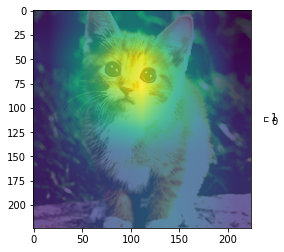

In [27]:
# plot original image with map overlayed
saliency_plot(input_batch, maps, mode="2D", alpha=0.8)